In this simulation, we will evolve a diploid population where each member is represented by two alleles, one from each parent.

Initial Pop: Your initial population will be represented by homozygous (both alleles are the same) gene pairs [1,1] and [0,0]

Children: A child is born from a given population by a two step process:

a. randomly choose 2 distinct parents from a population.
E.g. [0,1] [1,1]
b. Then, randomly select one allele from each parent
e.g. parent 1 =[0 ,1] randomly select 1.parent2 =[0,0] randomly select 0. then the child is [1, 0] c.add each child to a newGen array.

Statistics: With each generation you want to keep a count of genotypes "hom0"[0,0] , "hom1" [1,1], "het" [1,0] or [0,1] . You'll build a numpy array, adding a row with each generation. a. Note that [0,1] ~ [1,0]

Write a method called mendel: a. input: pop_size and gens.Output b. output : a pandas DataFrame - Convert your np.array into a pandas DataFrame.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
rng = np.random.default_rng()

In [3]:
pop = np.zeros((10,2)) #(x,y) x = rows, y = columns
pop

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [4]:
def dipBlend(pop_size, gens):
  inPop = np.zeros((pop_size,2))

  hom1 = 0
  hom0 = 0
  het = 0

  a = [1, 1]
  b = [0, 0]
  c = [0, 1]
  d = [1 ,0]  #Sulkow  - c and d are equivalent in genetics  #do i need to have d then?

  newCounts = []
  counts = []

  for i in range(pop_size):  #Sulkow - NICE use of the Remainder operator!
    if i % 2 == 0:
      inPop[i,] = [1,1]
    else:
      inPop[i,] = [0,0]
  #return inPop? return the counts of it?

  for i in range(pop_size):
    if np.array_equal(inPop[i], a):
      hom1+= 1
    elif np.array_equal(inPop[i], b):
      hom0+= 1
    elif np.array_equal(inPop[i], c):
      het+= 1
    elif np.array_equal(inPop[i], d):
      het+=1
  counts.append([hom1, hom0, het])      ## YOUR ERROR WAS HERE.  YOU PUT THE COUNTS IN THE LOOP which gave you extra rows.  Otherwise fine.

  for i in range(1, gens + 1):
    newGen = []
    hom1 = 0
    hom0 = 0
    het = 0
    newCounts = []

    for j in range(pop_size):
      parent1 = inPop[np.random.choice(pop_size, replace = False)]
      selector1 = np.random.choice(parent1, 1)[0]     #Sulkow - np.random.choice outputs a np array with one elt- you want to call that elt with the [0]
      parent2 = inPop[np.random.choice(pop_size, replace = False)]
      selector2 = np.random.choice(parent2, 1)[0]
      child = [selector1, selector2]
      newGen.append(child)

    for i in range(pop_size):
      if np.array_equal(newGen[i], a):        #runs for all of the new generations but does not count the initial pop    newGen[i] == a
        hom1+= 1
      elif np.array_equal(newGen[i], b):
        hom0+= 1
      elif np.array_equal(newGen[i], c):
        het+=1          #Sulkow c and d are both het
      elif np.array_equal(newGen[i], d):
        het+=1
    newCounts.append([hom1, hom0, het]) #try that, maybe it will make it be a list? might be wrong maybe try [[]] instead or space it out again


    counts = np.vstack((counts, newCounts))  #(())
    inPop = newGen


  df = pd.DataFrame(counts)
  df.columns=["hom1", "hom0", "het"]
  return df

                          # counts is getting the newGen, needs to be taking inital pop
                          # make a new list to take the counter of the inital pop, name it counts, and switich the name of the first counts to newCount
                          # then paste the counts together and return it

                          # now counts has inPop, newCOunts has newGen


      ##TO DO
        #Create a list, counts, with counts for your initial pop  put in a np.array(counts)
        #For each generation thereafter,  create a list, newCount,  with counts of the newGen
        #redefine counts = paste together (np.vstack) counts and Newcount.
        #redefine pop1 = newGen    #fixed
        #return counts

  #dipBlend(10,5)
  #return counter

##    for i in range(gens):
##    newGen = []
##    for j in range(pop_size):
##      parents = np.random.choice(pop, 2, replace = False)
##      child = np.mean(parents)
##     newGen.append(child)


In [6]:
df =dipBlend(3000,40)
df

,hom1,hom0,het
0,1500,1500,0
1,749,756,1495
2,725,738,1537
3,760,730,1510
4,725,745,1530
5,749,772,1479
6,746,768,1486
7,769,746,1485
8,714,745,1541
9,706,781,1513


In [ ]:
#  def mendel(pop_size, gens):            NOT NEEDED
#    counts = dipBlend(pop_size, gens)
##    df = pd.DataFrame(counts)
#    df.columns = ["Gen", "hom0", "hom1", "het"]

#    return df

df = dipBlend(3000,50)



<Axes: xlabel='None', ylabel='hom1'>

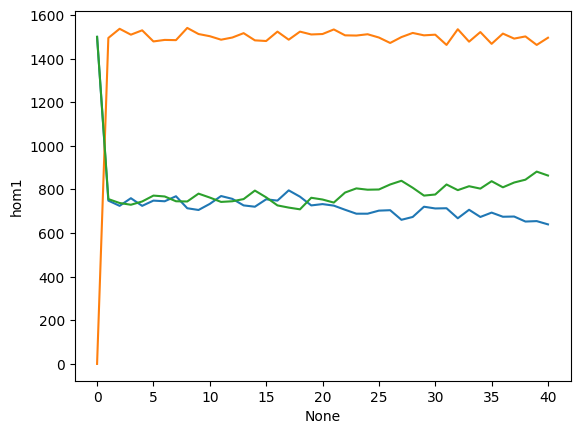

In [8]:
sns.lineplot(x = df.index, y = df["hom1"])
sns.lineplot(x = df.index , y = df["het"])
sns.lineplot(x = df.index, y = df["hom0"])


In [ ]:
z = np.zeros((10,2))
for i in range(len(z)):
  print(np.array_equal(z[i], [0,0]))


z[i,]==[0,0]

True
True
True
True
True
True
True
True
True
True


array([ True,  True])

space

In [ ]:
#Sulkow-  check out print out without the [0] on selector1
pop1 = np.zeros((10,2))
for i in range(10):
  if i % 2 ==0 :
    pop1[i,] = [1,1]


for i in range(50):
    newGen = []
    for j in range(10):
      parent1 = pop1[np.random.choice(10, replace = False)]
      selector1 = np.random.choice(parent1, 1)
      parent2 = pop1[np.random.choice(10, replace = False)]
      selector2 = np.random.choice(parent2, 1)
      child = [selector1, selector2]
    newGen.append(child)
    print (newGen)

[[array([0.]), array([1.])]]
[[array([0.]), array([0.])]]
[[array([1.]), array([1.])]]
[[array([0.]), array([0.])]]
[[array([0.]), array([1.])]]
[[array([1.]), array([1.])]]
[[array([1.]), array([1.])]]
[[array([0.]), array([1.])]]
[[array([1.]), array([1.])]]
[[array([0.]), array([1.])]]
[[array([0.]), array([1.])]]
[[array([1.]), array([1.])]]
[[array([0.]), array([1.])]]
[[array([0.]), array([1.])]]
[[array([0.]), array([1.])]]
[[array([1.]), array([1.])]]
[[array([1.]), array([0.])]]
[[array([0.]), array([1.])]]
[[array([1.]), array([1.])]]
[[array([1.]), array([0.])]]
[[array([0.]), array([1.])]]
[[array([0.]), array([0.])]]
[[array([0.]), array([1.])]]
[[array([1.]), array([0.])]]
[[array([1.]), array([0.])]]
[[array([1.]), array([0.])]]
[[array([0.]), array([1.])]]
[[array([1.]), array([0.])]]
[[array([0.]), array([0.])]]
[[array([1.]), array([0.])]]
[[array([0.]), array([0.])]]
[[array([1.]), array([1.])]]
[[array([0.]), array([0.])]]
[[array([1.]), array([0.])]]
[[array([1.]),